# chapter 01. 데이터에서 인사이트 발견하기
## 1.1 탐색적 데이터 분석
### 1.1.1 데이터와의 첫 만남
1. 데이터의 출처와 주제
1. 데이터의 크기
1. 데이터의 구성 요소(피처: feature)

### 1.1.2 데이터의 속성 탐색하기
* 피처의 속성 탐색
* 피처 간의 상관 관계 탐색
 
#### 1.1.2.1 피처의 속성 탐색
평균, 표준편차, 중앙값, 데이터의 사분위 수 등의 통계값  
-> 피처의 측정 가능한 정량적 속성을 정의하는 것

#### 1.1.2.2 피처간의 상관 관계 분석
피처 간의 공분산, 혹은 상관 계수

### 1.1.3 탐색한 데이터의 시각화
matplotlib, seaborn 등을 활용하여 시각화

## 1.2 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기
### Step1. 탐색: 데이터의 기초 정보 살펴보기
> chipotle 데이터셋의 기초 정보 출력하기

In [2]:
import pandas as pd

file_path = 'data/chipotle.tsv'
# read_csv() 함수로 데이터를 데이터프레임 형태로 불러옵니다.
chipo = pd.read_csv(file_path, sep='\t')

print(chipo.shape)
print("-" * 20)
print(chipo.info())

(4622, 5)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [5]:
print(chipo.columns)
print("-"*30)
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------
RangeIndex(start=0, stop=4622, step=1)


In [6]:
# order_id는 숫자의 의미를 가지지 않기 때문에 문자열(str)로 변경
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe()) # 통계 정보 확인

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


#### order_id와 item_name의 개수
이 두 피처는 범주형 피처이므로 unique() 함수를 사용하여 몇개의 범주를 가지고 있는지 확인한다.

In [7]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


### Step2. 인사이트의 발견: 탐색과 시각화 하기
#### 가장 많이 주문한 아이템 Top 10

In [8]:
# 가장 많이 주문한 아이템 Top 10 을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


#### 아이템별 주문 개수와 총량

In [12]:
# 아이템별 주문 개수 구하기
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # 아이템 별 주문 개수를 출력

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [13]:
# 아이템별 주문 총량 구하기
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

#### 시각화
> 시각화로 분석 결과 살펴보기

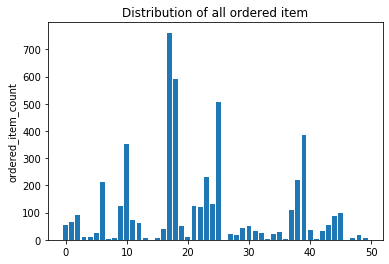

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list)) # 이름을 그대로 출력할 수 없어서, 0~아이템 숫자 로 표현
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

### Step3. 데이터 전처리: 전처리 함수 사용하기
> item_price 피처 살펴보기

In [15]:
print(chipo.info())
print('*'*30)
print(chipo['item_price'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
******************************
0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object


In [16]:
# column 단위 데이터에 apply 함수로 전처리를 적용합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


### Step 4. 탐색적 분석: 스무고개로 개념적 탐색 분석하기
#### 주문당 평균 계산금액 출력하기
> 주문당 평균 계산 금액을 출력합니다.

In [17]:
chipo.groupby('order_id')['item_price'].sum().mean()


18.811428571428568

#### 한 주문에 10달러 이상 지불한 주문 번호(id) 출력하기

In [19]:
chipo_orderid_group = chipo.groupby('order_id').sum()
chipo_orderid_group

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50
